<a href="https://colab.research.google.com/github/wacosta86/talento_tech_data_analyst_integrator/blob/main/titanic_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Set the style of seaborn plots to "white"
sns.set(style="white")

# Read the Titanic dataset from the specified URL
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Determines if a passenger is a woman, child, or man based on age and sex
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

# Assign new columns and transform existing ones in the titanic dataset
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(bool)
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


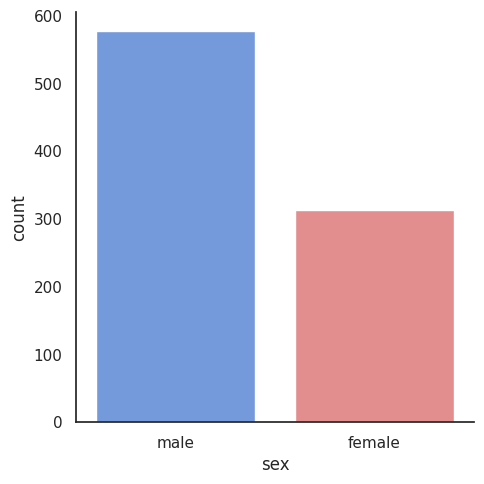

In [ ]:
# set up a palette dictionary for some of the plots
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

# count the number of males and females, ignoring age
sns.catplot(x="sex", kind="count", data=titanic, hue="sex", palette=pal, legend=False)

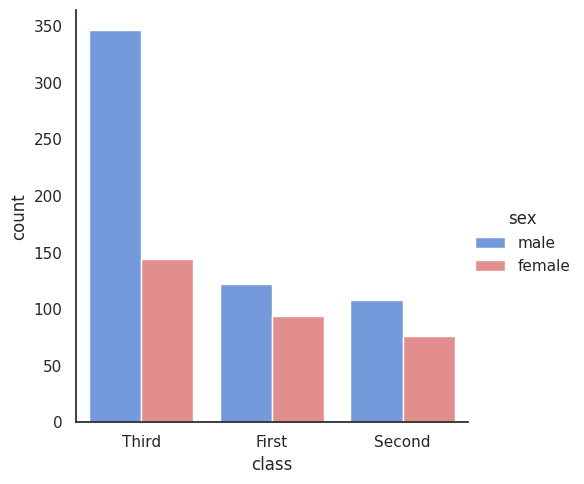

In [ ]:
# Create a categorical plot to count passengers in each class, distinguishing between male and female
sns.catplot(x="class", data=titanic, hue="sex", kind="count", palette=pal)

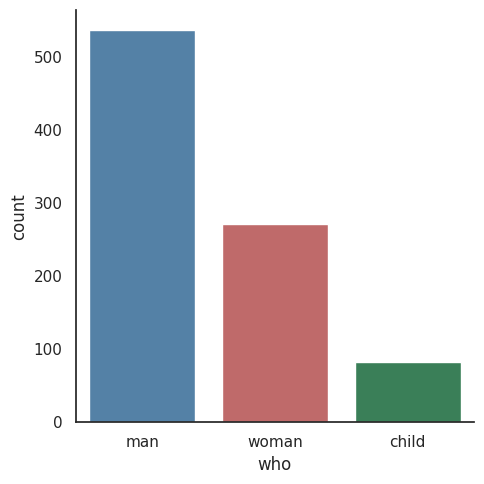

In [ ]:
# Create a categorical plot to count the number of passengers categorized as men, women, or children
sns.catplot(x="who", hue="who", data=titanic, kind="count", palette=pal, legend=False)

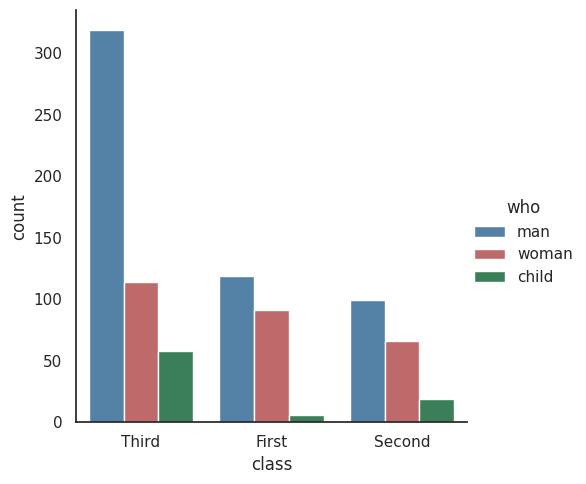

In [ ]:
# Create a categorical plot to count the number of passengers in each class, distinguishing between men, women, and children
sns.catplot(x="class", data=titanic, hue="who", palette=pal, kind="count")

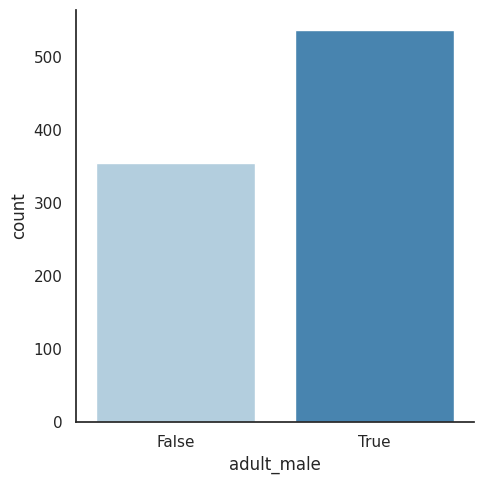

In [ ]:
# Create a categorical plot to count the number of adult males
sns.catplot(x="adult_male", hue="adult_male", data=titanic, kind="count", palette="Blues", legend=False)

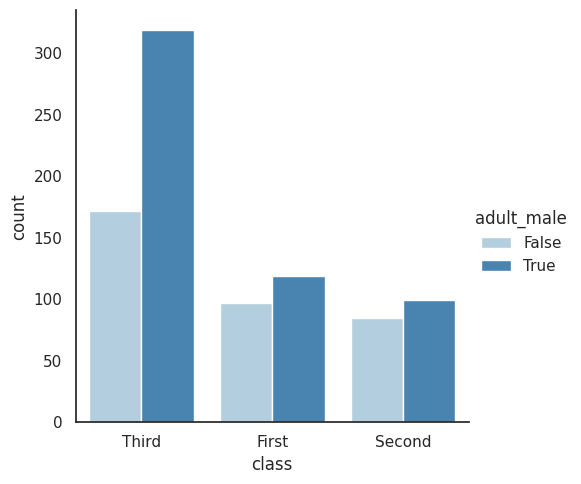

In [ ]:
# Create a categorical plot to count the number of adult males and females in each class
sns.catplot(x="class", data=titanic, hue="adult_male", kind="count", palette="Blues")

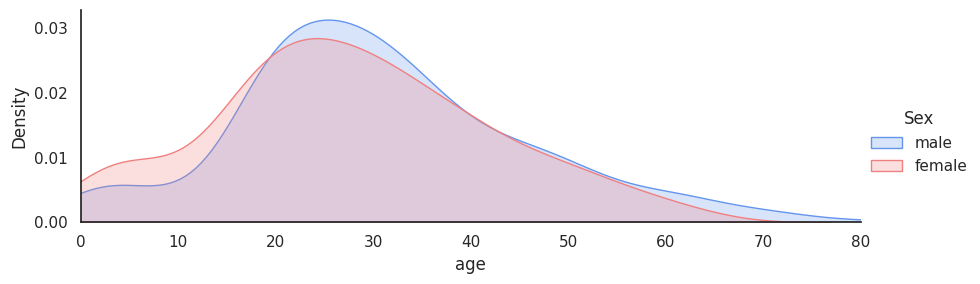

In [ ]:
# Create a FacetGrid to visualize the age distribution of male and female passengers using kernel density estimates
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=pal).map(sns.kdeplot, "age", fill=True).set(xlim=(0, 80))

# Add a legend to the plot to show the sex corresponding to each color
fg.add_legend(title="Sex")

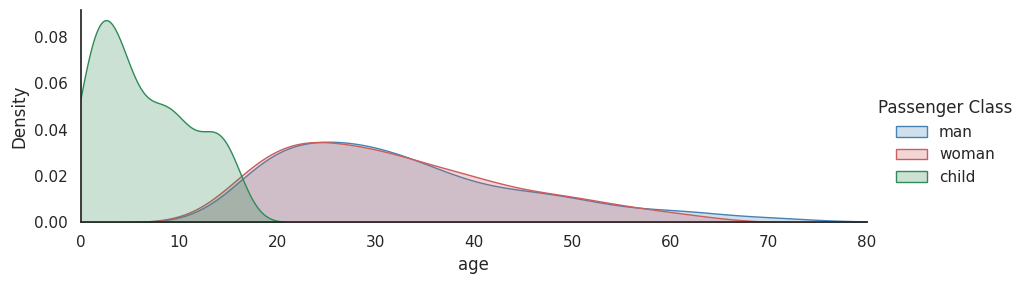

In [ ]:
# Create a FacetGrid to visualize the age distribution of men, women, and children using kernel density estimates
fg = sns.FacetGrid(titanic, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", fill=True)
fg.set(xlim=(0, 80))

# Add a legend to the plot to show the class corresponding to each color
fg.add_legend(title="Passenger Class")

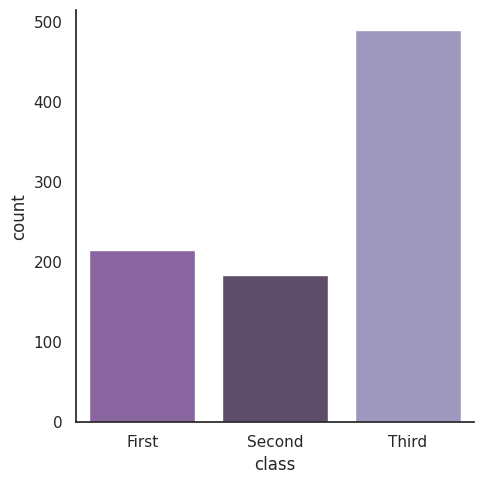

In [ ]:
# Create a categorical plot to visualize the distribution of passenger classes
sns.catplot(x="class", kind="count", data=titanic, hue="class", palette="BuPu_d", legend=False, order=["First", "Second", "Third"])

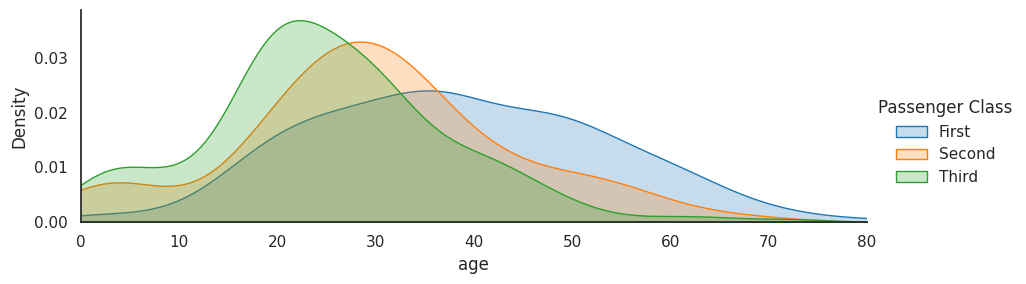

In [ ]:
# Define the order of the classes
class_order = ["First", "Second", "Third"]

# Create a FacetGrid to visualize the age distribution of passengers by class using kernel density estimates
fg = sns.FacetGrid(titanic, hue="class", hue_order=class_order, aspect=3, palette=custom_palette)
fg.map(sns.kdeplot, "age", fill=True)
fg.set(xlim=(0, 80))

# Add a legend to the plot to show the class corresponding to each color
fg.add_legend(title="Passenger Class")

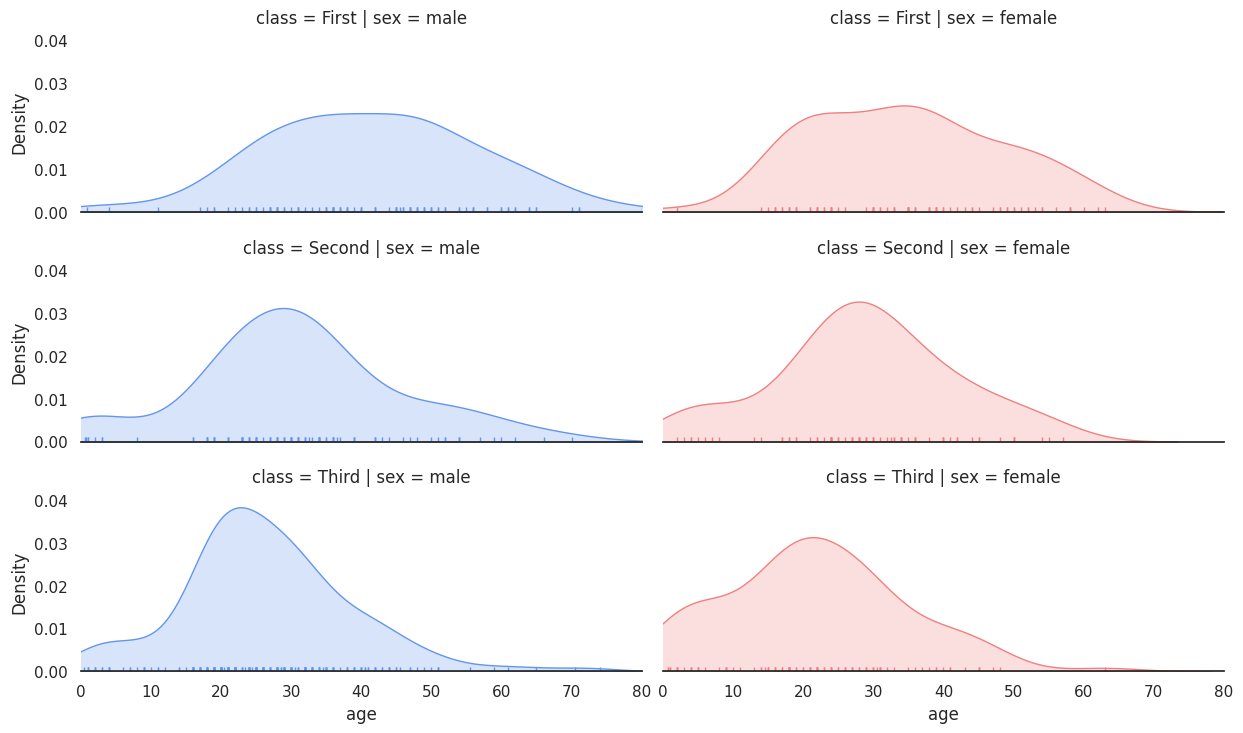

In [ ]:
# Define the order of classes and sex
class_order = ["First", "Second", "Third"]
sex_order = ["male", "female"]

# Create a FacetGrid to visualize the age distribution of passengers by sex and class using kernel density estimates
fg = sns.FacetGrid(titanic, col="sex", col_order=sex_order, row="class", row_order=class_order, hue="sex", height=2.5, aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "age", fill=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80))

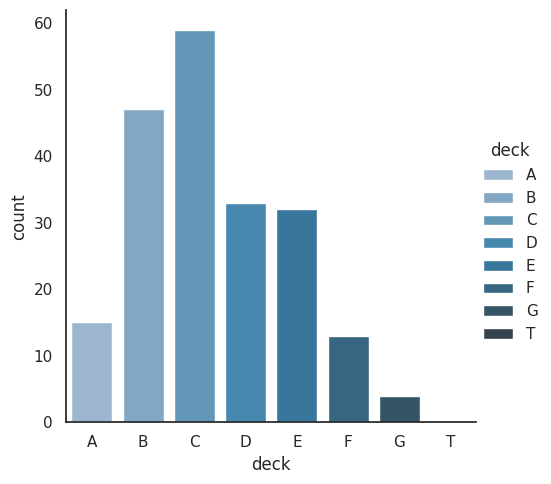

In [ ]:
# Define the order of the decks
deck_order = ["A", "B", "C", "D", "E", "F", "G", "T"]

# Create a categorical plot to visualize the distribution of passengers across different decks
sns.catplot(x="deck", kind="count", data=titanic, palette="PuBu_d", hue="deck", order=deck_order, hue_order=deck_order)

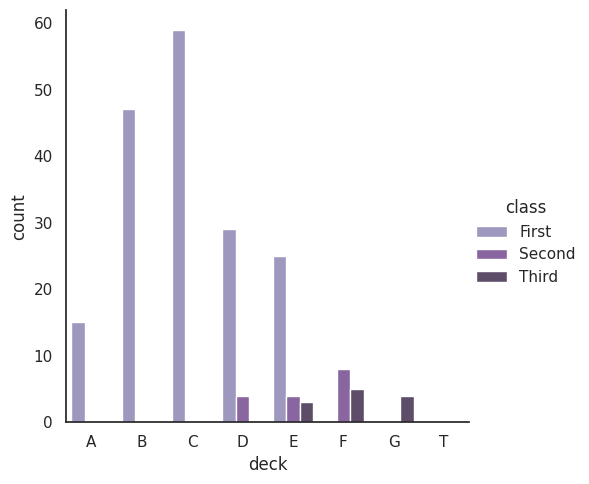

In [ ]:
# Define the desired order of the class and deck
class_order = ["First", "Second", "Third"]
deck_order = ["A", "B", "C", "D", "E", "F", "G", "T"]

# Reorder the categories of the "class" and "deck" columns
titanic["class"] = pd.Categorical(titanic["class"], categories=class_order, ordered=True)
titanic["deck"] = pd.Categorical(titanic["deck"], categories=deck_order, ordered=True)

# Create a categorical plot to visualize the count of passengers in each deck,
sns.catplot(x="deck", hue="class", kind="count", data=titanic, palette="BuPu_d", order=deck_order, hue_order=class_order)

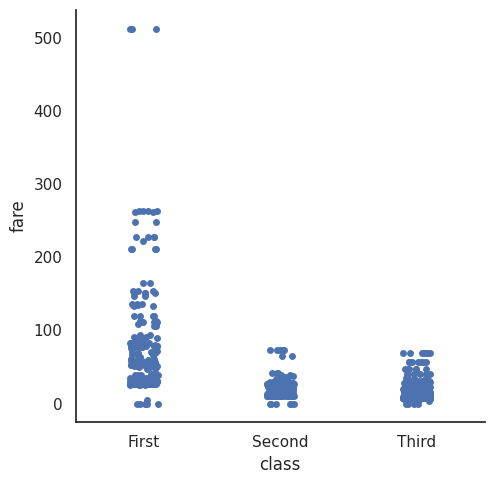

In [ ]:
# Set the style to "white"
sns.set(style="white")

# Create a categorical plot of class vs fare
sns.catplot(x="class", y="fare", data=titanic)

(0.0, 600.0)

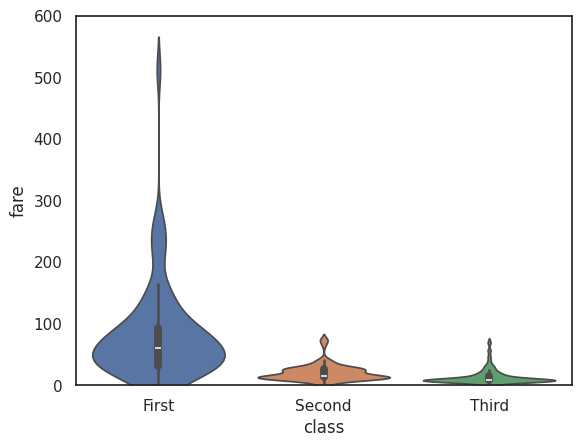

In [ ]:
# Create a violin plot to visualize the distribution of fares for each passenger class
sns.violinplot(x="class", y="fare", data=titanic, hue="class").set_ylim(0, 600)

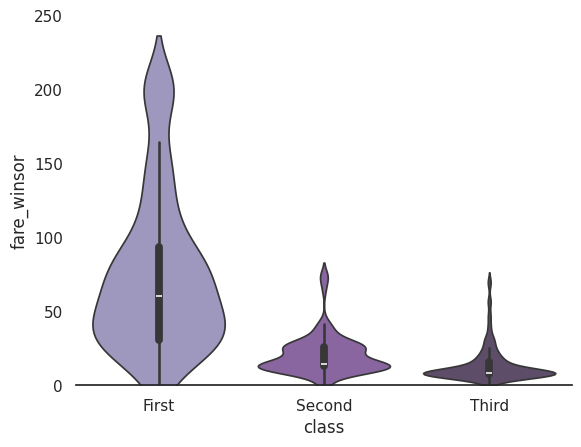

In [ ]:
# Create a new column "fare_winsor" in the Titanic dataset, limiting the fare values to a maximum of 200
titanic["fare_winsor"] = titanic.fare.map(lambda f: min(f, 200))

# Create a violin plot to visualize the distribution of fare_winsor for each passenger class, with the y-axis limited to 0-250
sns.violinplot(x="class", y="fare_winsor", data=titanic, hue="class", palette="BuPu_d", legend=False).set_ylim(0, 250)
sns.despine(left=True)